**Regressão Linear usando RandomForestRegressor**

Vamos prever valores do ouro, baseado em informações do mercado, depois testar a precisão de nossa previsão

In [3]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
df = pd.read_csv('gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
# tamanho do dataset
df.shape

(2290, 6)

In [7]:
# características dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checando por valores faltantes
# obs: já foi visto na função .info() que não haviam missing values, 
# mas podemos usar esta função também
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# estatística do dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
# correlação entre colunas
correlation = df.corr(numeric_only=True)
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Figure size 1000x1000 with 0 Axes>

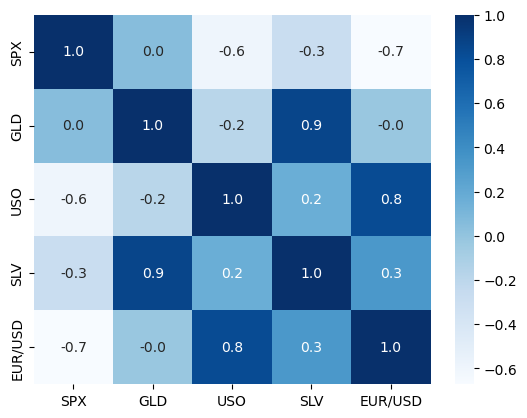

<Figure size 1000x1000 with 0 Axes>

In [23]:
# construindo o mapa de calor para visualizar melhor a correlação
sns.heatmap(correlation, annot=True, cbar=True, fmt='.1f', cmap='Blues')
plt.figure(figsize=(10,10))

In [24]:
# valores de correlação para "GLD"
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\mau_a\AppData\Local\Temp\ipykernel_3548\3104136908.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

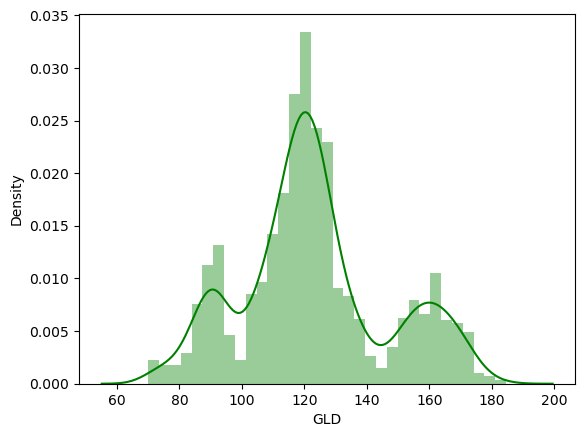

In [27]:
# checar a distribuição dos preços de ouro 
sns.distplot(df['GLD'], color='green')

In [28]:
# vamos separar os dados em previsores e alvo
X = df.drop(['Date','GLD'], axis=1)
Y = df['GLD']

In [29]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [42]:
# separando os dados em dados de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=2, test_size=0.2)

In [43]:
# renomeando nosso modelo para um nome mais simples para usar
regressor = RandomForestRegressor(n_estimators=100)

In [44]:
# treinando nosso modelo com os dados do dataset
regressor.fit(X,Y)

RandomForestRegressor()

In [49]:
previsao_y_treino = regressor.predict(X_train)
previsao_y_teste = regressor.predict(X_test)

In [50]:
# agora vamos medir o R quadrático dos dados de treino, para saber a proporção da variabilidade na variável resposta explicada 
# pela variável preditora, quanto mais próximo de 1 melhor


# R squared error
score_1 = metrics.r2_score(Y_train, previsao_y_treino)
print('R squared error: ', score_1)

R squared error:  0.9987345477344534


In [51]:
# vamos calcular o erro médio absoluto dos dados de treino, ele mede a média da diferença absoluta entre os valores previstos 
# pelo modelo e os valores observados


# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, previsao_y_treino)
print(' Mean absolute error: ', score_2)

 Mean absolute error:  0.43958471846069885


In [52]:
# agora vamos medir o R quadrático dos dados de teste, para saber a proporção da variabilidade na variável resposta explicada 
# pela variável preditora, quanto mais próximo de 1 melhor


# R squared error
score_1 = metrics.r2_score(Y_test, previsao_y_teste)
print('R squared error: ', score_1)

R squared error:  0.9984863955885052


In [53]:
# vamos calcular o erro médio absoluto dos dados de teste, ele mede a média da diferença absoluta entre os valores previstos 
# pelo modelo e os valores observados


# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, previsao_y_teste)
print(' Mean absolute error: ', score_2)

 Mean absolute error:  0.46009787286025716


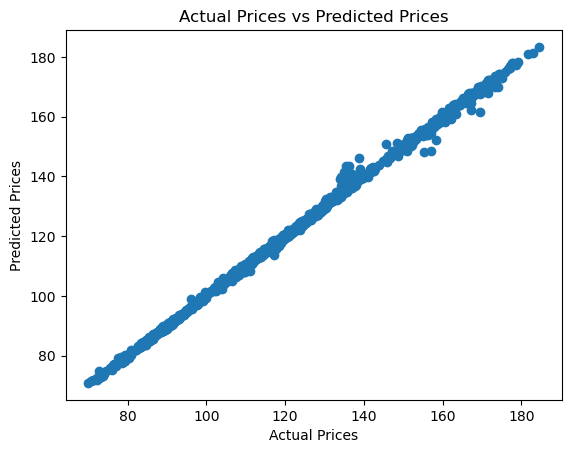

In [54]:
# plotando um gráfico de linha com valores atuais em x e valores preditos em y com os dados de treino
# como previsto pelo R quadrado, é bem próximo, ou seja nosso modelo explica muito bem os preços das casas
plt.scatter(Y_train, previsao_y_treino)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

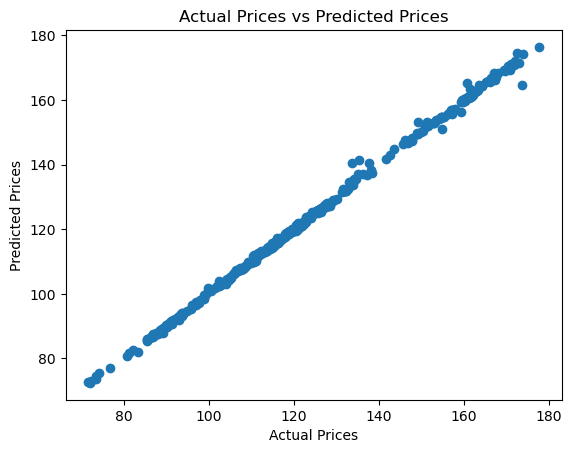

In [55]:
# plotando um gráfico de linha com valores atuais em x e valores preditos em y com os dados de teste
# como previsto pelo R quadrado, é bem próximo, ou seja nosso modelo explica muito bem os preços das casas
plt.scatter(Y_test, previsao_y_teste)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()